In [1]:
import contextily as cx
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans

In [2]:
df = gpd.read_file(r'data/streams.geojson')
df.dropna(subset=['name'], inplace=True)
df.to_crs(epsg=3857, inplace=True)

In [3]:
c_vec = CountVectorizer(analyzer='word')
X_train = c_vec.fit_transform(list(df.name))
kmeans = KMeans(n_clusters=16, random_state=86).fit(X_train)
df['cID'] = kmeans.labels_

In [4]:
labels = {0:'N/W & Creek', 1:'Creek', 2:'South Platte River', 3:'Ditch', 4:'River', 5:'Canyon', 6:'Draw', 7:'Gulch', 
          8:'Divide Creek', 9:'South & Creek',10: 'Arkansas River',11: 'East & Creek',12: 'Fork',13: 'Canal/Wash/Tunnel/Slough/Valley/Arroyo', 14:'Dry',15: 'un-named'}

In [5]:
def to_category(row):
    return labels.get(row.cID)
df['category'] = df.apply(to_category, axis=1)

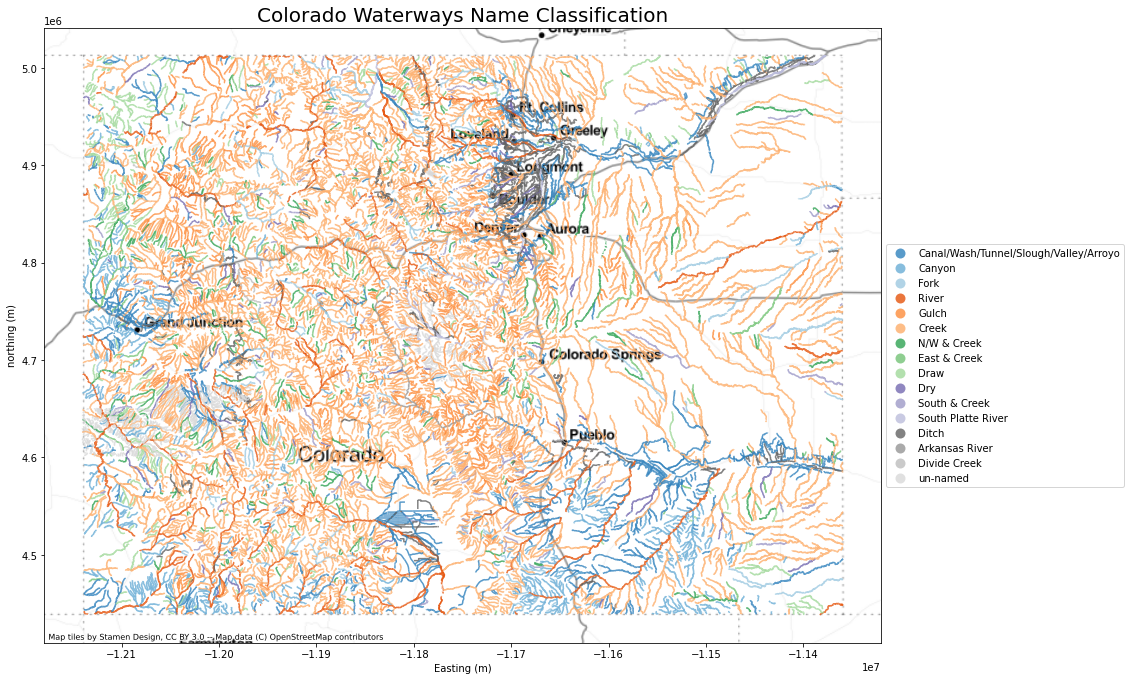

In [6]:
fig,ax = plt.subplots(1, figsize=(15,15))
df.plot(column='category', cmap='tab20c', legend=True, categorical=True, categories=list(df.category.unique()),
        legend_kwds={'loc': 'center left', 'bbox_to_anchor':(1,0.45)}, ax=ax, alpha=0.8)
cx.add_basemap(ax, source=cx.providers.Stamen.TonerLite, zoom=7)
ax.set_title('Colorado Waterways Name Classification', fontsize=20)
ax.set_xlabel('Easting (m)')
ax.set_ylabel('northing (m)')
plt.savefig('Day_18.png')